# Case Study: Titanic Survival Prediction

## Problem Statement

- 1502 out of 2224 passengers and crew died when Titanic sank.
- Predict the survival of Titanic passenger using their data (name, age, gender, socio-economic class, etc).
- Achieve high **accuracy** in the Kaggle competition.

## Data

We will use the Titanic dataset.

The dataset is provided by [Kaggle](https://www.kaggle.com/competitions/titanic/overview).

**The dataset is split into two parts**:

- Training set (train.csv): Labeled data for training.
- Test set (test.csv): Unlabeled data for testing predictors and submitting.

**The Dataset Attributes**:

| Attribute   | Definition                                 | Key                                            |
|-------------|--------------------------------------------|------------------------------------------------|
| survival    | Survival                                   | 0 = No, 1 = Yes                                |
| pclass      | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex         | Sex                                        |                                                |
| Age         | Age in years                               |                                                |
| sibsp       | # of siblings / spouses aboard the Titanic |                                                |
| parch       | # of parents / children aboard the Titanic |                                                |
| ticket      | Ticket number                              |                                                |
| fare        | Passenger fare                             |                                                |
| cabin       | Cabin number                               |                                                |
| embarked    | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |
| Passengerid | ID of passenger                            |                                                |


>We should add the expected type of each feature.

**Additional attributes notes**:

pclass: A proxy for socio-economic status (SES)

- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

**Size**:
- Train set: 891 instance.
- Test set: 418 instance.

## Used Packages


In [1]:
# Imports
# Basic Packages
import numpy as np      # linear algebra
import pandas as pd     # data preprocessing, CSV file I/O

# Visual
import matplotlib.pyplot as plt     #  basic plotting
import seaborn as sns               # prettier plots
from IPython.display import display

# ML
from sklearn import svm, metrics, model_selection, preprocessing, tree, linear_model, ensemble, naive_bayes, neighbors    # model training and evaluation
from xgboost import XGBClassifier
from sklearn import feature_selection

# Show plots inside the notebook
%matplotlib inline

# Show max cols
pd.set_option("display.max_columns", 50)

## Get Data

### Load Data

In [2]:
# Load dataset
df_train = pd.read_csv("./data/titanic/train.csv")
df_test = pd.read_csv("./data/titanic/test.csv")

### A Quick Look
We'll check tde dataset structure and size.

In [3]:
# First 5 instances in train dataset
print("\033[1mTrain dataset\033[0m")
display(df_train.head())

# Check Shape
print(f'The train dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns.')

# Check columns names
print(f'The columns are {df_train.columns.values}.')

Train dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The train dataset has 891 rows and 12 columns.
The columns are ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked'].


In [4]:
# First 5 instances in test dataset
print("\033[1mTest dataset\033[0m")
display(df_test.head())

# Check Shape
print(f'The test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns.')

# Check columns names
print(f'The columns are {df_test.columns.values}.')

Test dataset


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The test dataset has 418 rows and 11 columns.
The columns are ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked'].


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### General Notes about the data
- The `PassengerId` column won't be useful for ML models but is needed in the test set for submission.
- Our classification target is `Survived`.
- The dataset has 10 attributes.
- The attributes types are (numerical, categorical, string).
- Some features have missing values in the both datasets.

In [7]:
# Check number of unique values in each columns
df_train.nunique().sort_values() 

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [8]:
df_test.nunique().sort_values()

Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            8
Cabin           76
Age             79
Fare           169
Ticket         363
PassengerId    418
Name           418
dtype: int64

**The Categorical attributes are**:
- Sex
- Embarked
- Pclass (Ordinal)

**The Numerical attributes are**:
- Continuos:
  - Age
  - Fare
- Discrete:
  - Sibsp
  - Parch

The other attributes are a mix of alphanumerical and numerical.

**The target `Survived` is categorical so it's a classification task.**


For Cabin, we can extract the first letter, let's call it the cavbin level. We get 8 levels, we may check if there is a correlation between the fare and the cabin level and between the cabin level and the survival rate.

In [48]:
cabin_levels = []
for cabin in df_train.Cabin.unique():
    if not pd.isna(cabin):
        cabin_levels.append(cabin[0])
print(set(cabin_levels))

{'D', 'A', 'C', 'F', 'B', 'G', 'T', 'E'}


In [16]:
def get_cabin_level(cabin):
    if not pd.isna(cabin):
        return cabin[0]
    else:
        return "unknown"

In [17]:
df_train["cabin_level"] = df_train["Cabin"].apply(lambda cabin : get_cabin_level(cabin))

In [18]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_level
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,unknown


## EDA
We'll explore the data statistically and visually to get useful info and clear the data if needed.

In [19]:
# Check for missing data
print(f'Number of missing data: {df_train.isnull().sum().sum()}.')

# Check for duplicated samples
print(f'Number of duplicates: {df_train.duplicated().sum()}.')

Number of missing data: 866.
Number of duplicates: 0.


In [20]:
# Check attributes with missing data
display(df_train.isnull().sum().sort_values(ascending=False))

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
cabin_level      0
dtype: int64

The train data has missing values in attributes:
- `Cabin`
- `Age`
- `Embarked`

In [21]:
display(df_test.isnull().sum().sort_values(ascending=False))

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

The test data has missing values in attributes:
- `Cabin`
- `Age`
- `Fare`

The data needs some cleaning by imputing missing values or dropping attributes.

First, We'll drop irrelevant attributes from the train dataset and then check the stats.

In [22]:
# Drop 'id'
df_train.drop(["PassengerId"], axis=1, inplace=True)

# Some useful variables
target = ["Survived"]
features = np.array([c for c in df_train.columns if c not in target])

# Create a backup dataframe
original_df = df_train.copy()

df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_level
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,unknown
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,unknown
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,unknown


In [23]:
# Check descriptive stats
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
categorical_features = ["Embarked", "Pclass", "Sex", "cabin_level"]
discrete_numeric_features = ["SibSp", "Parch"]
continous_numeric_features = ["Age", "Fare"]
numeric_features = discrete_numeric_features + continous_numeric_features

## Numeric Features

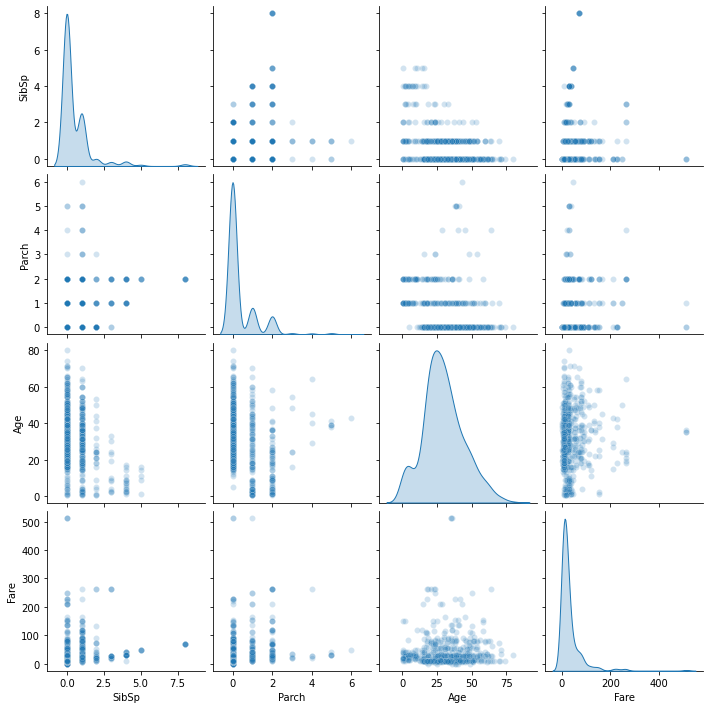

In [61]:
sns.pairplot(df_train[numeric_features], diag_kind="kde", plot_kws={"alpha":0.2})

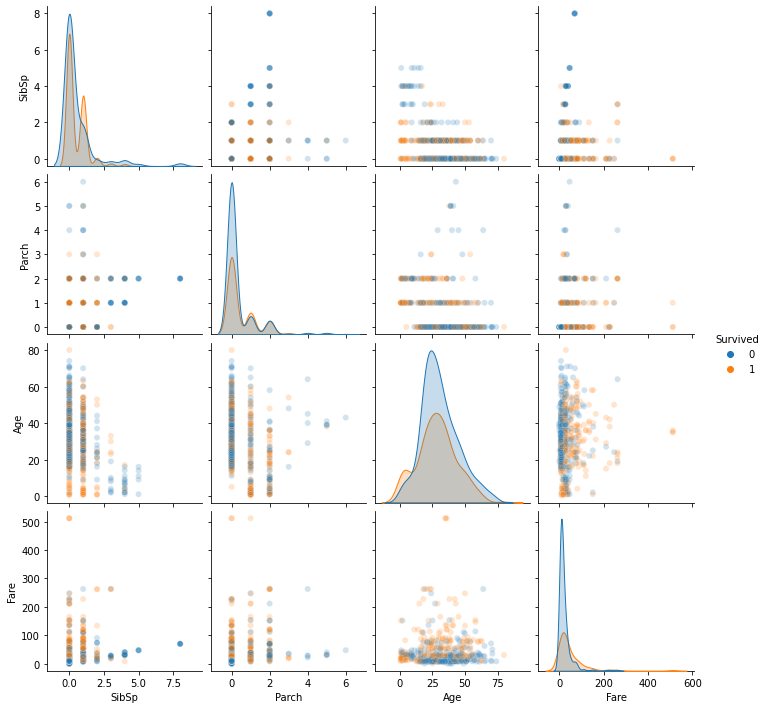

In [62]:
sns.pairplot(df_train[numeric_features + ["Survived"]], hue = "Survived", plot_kws={"alpha":0.2})

General Notes:

* Obviously, we need to scale all numeric features to have nearby ranges.
* Age suffer from small skewness, still needs log-transformation.
* Sibsp, Parch, Fare suffer from large skewness.

<AxesSubplot:>

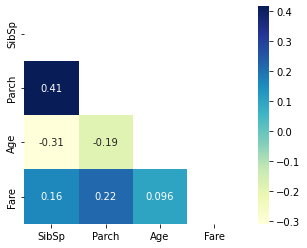

In [63]:
corr_matrix = df_train[numeric_features].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, mask=mask, square=True)

Based on the correlation heatmap between numeric features, we shouldn't remove any features, at least for now.

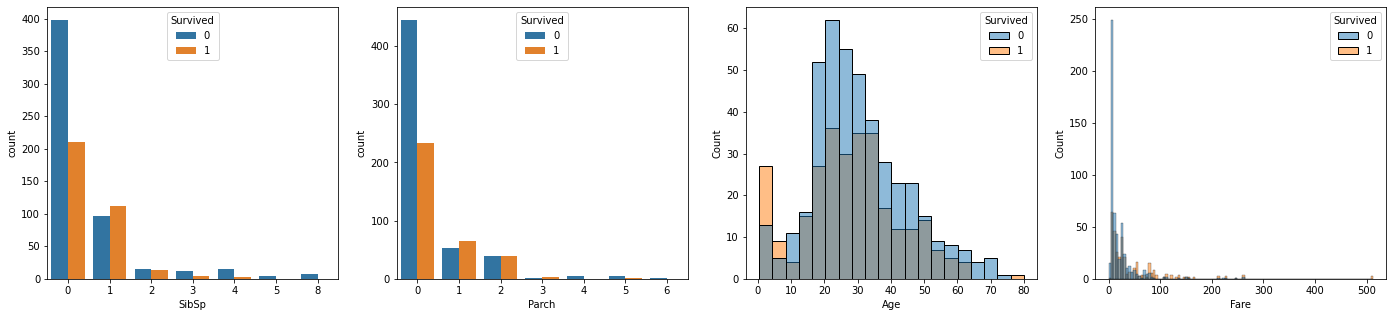

In [72]:
fig, axes = plt.subplots(1, len(numeric_features), figsize=[24, 5])
for i, feature in enumerate(numeric_features):
    if feature in discrete_numeric_features:
        sns.countplot(data=df_train, x=feature, hue="Survived", ax=axes[i])
    else:
        sns.histplot(data=df_train, x=feature, hue="Survived", ax=axes[i])

### Categorical Features

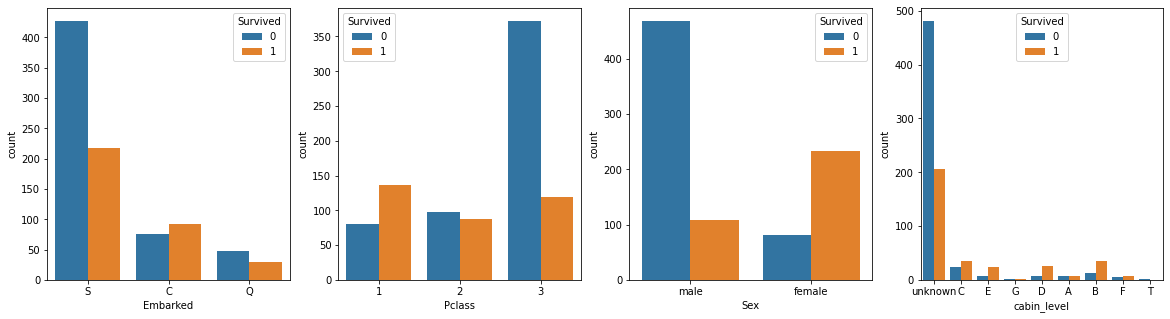

In [76]:
fig, axes = plt.subplots(1, len(categorical_features), figsize=[5 * len(categorical_features), 5])
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df_train, x=feature, hue="Survived", ax=axes[i])

IMO, we should discard the cabin feature, it has about more than 70% missing values.

## Data Preparation

## Check Promising Models

## Fine-Tuning

## Models Performance

## Conclusion

## References